In [ ]:
import pandas as pd
df = pd.read_csv('/diabetes_012_health_indicators_BRFSS2015.csv')

print(df.columns)
print(df.head)

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
<bound method NDFrame.head of         Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1

## **Evaluasi dengan Semua Fitur Dataset**
# Tanpa Penghapusan Outlier
Evaluasi menggunakan Logistic Regression dengan Oversampling (SMOTE) dan Undersampling (RandomUnderSampler)

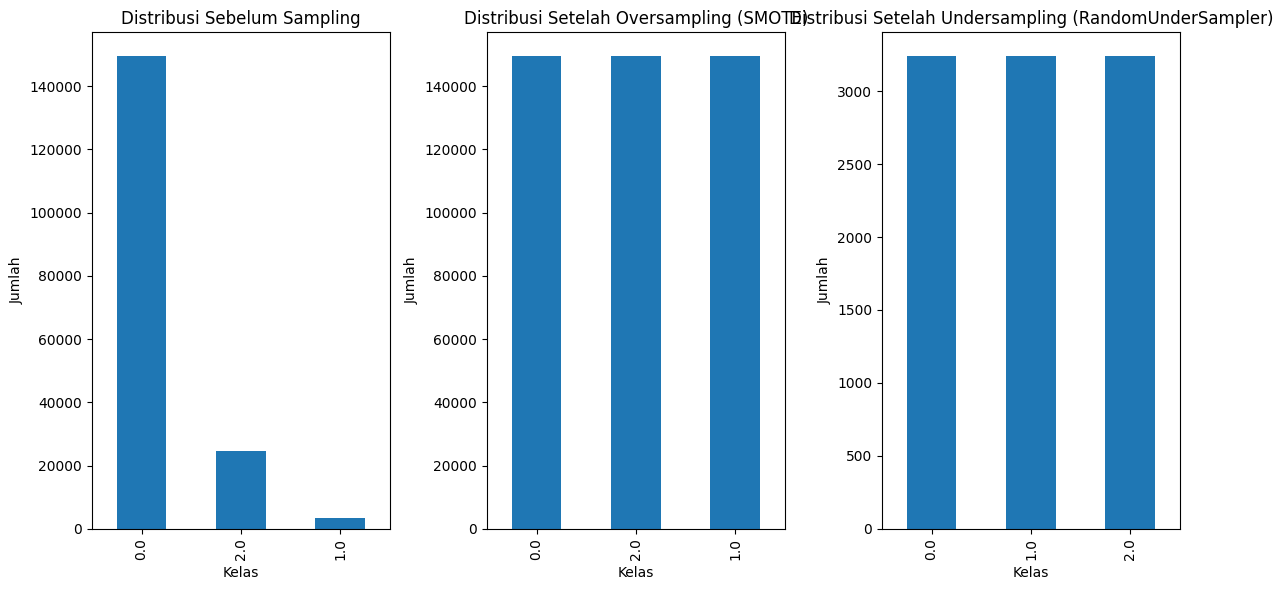

Evaluasi model dengan oversampling (SMOTE):
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78     64111
         1.0       0.03      0.30      0.05      1389
         2.0       0.35      0.59      0.44     10604

    accuracy                           0.64     76104
   macro avg       0.44      0.51      0.42     76104
weighted avg       0.85      0.64      0.72     76104

Evaluasi model dengan undersampling (RandomUnderSampler):
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78     64111
         1.0       0.03      0.30      0.06      1389
         2.0       0.36      0.59      0.44     10604

    accuracy                           0.65     76104
   macro avg       0.45      0.52      0.43     76104
weighted avg       0.85      0.65      0.72     76104



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Memisahkan fitur dan target
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Visualisasi distribusi sebelum sampling
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
y_train.value_counts().plot(kind='bar')
plt.title('Distribusi Sebelum Sampling')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

# Oversampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Visualisasi distribusi setelah SMOTE
plt.subplot(1, 3, 2)
pd.Series(y_train_smote).value_counts().plot(kind='bar')
plt.title('Distribusi Setelah Oversampling (SMOTE)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

# Undersampling menggunakan RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Visualisasi distribusi setelah RandomUnderSampler
plt.subplot(1, 3, 3)
pd.Series(y_train_rus).value_counts().plot(kind='bar')
plt.title('Distribusi Setelah Undersampling (RandomUnderSampler)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

# Melatih model Logistic Regression dengan data oversampled
model_smote = LogisticRegression(random_state=42, max_iter=5000, solver='saga', tol=1e-3)
model_smote.fit(X_train_smote, y_train_smote)

# Memprediksi pada set pengujian
y_pred_smote = model_smote.predict(X_test)

# Evaluasi model dengan data oversampled
print("Evaluasi model dengan oversampling (SMOTE):")
print(classification_report(y_test, y_pred_smote))

# Melatih model Logistic Regression dengan data undersampled
model_rus = LogisticRegression(random_state=42, max_iter=5000, solver='saga', tol=1e-3)
model_rus.fit(X_train_rus, y_train_rus)

# Memprediksi pada set pengujian
y_pred_rus = model_rus.predict(X_test)

# Evaluasi model dengan data undersampled
print("Evaluasi model dengan undersampling (RandomUnderSampler):")
print(classification_report(y_test, y_pred_rus))

Evaluasi menggunakan Gradient Boost dengan Oversampling (SMOTE) dan Undersampling (RandomUnderSampler)



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Oversampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Undersampling menggunakan RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Melatih model Gradient Boosting dengan data oversampled
model_smote = GradientBoostingClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# Memprediksi pada set pengujian
y_pred_smote = model_smote.predict(X_test)

# Evaluasi model dengan data oversampled
print("Evaluasi model dengan oversampling (SMOTE):")
print(classification_report(y_test, y_pred_smote, zero_division=1))

# Melatih model Gradient Boosting dengan data undersampled
model_rus = GradientBoostingClassifier(random_state=42)
model_rus.fit(X_train_rus, y_train_rus,)

# Memprediksi pada set pengujian
y_pred_rus = model_rus.predict(X_test)

# Evaluasi model dengan data undersampled
print("Evaluasi model dengan undersampling (RandomUnderSampler):")
print(classification_report(y_test, y_pred_rus, zero_division=1))

Evaluasi model dengan oversampling (SMOTE):
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90     64111
         1.0       1.00      0.00      0.00      1389
         2.0       0.43      0.44      0.44     10604

    accuracy                           0.83     76104
   macro avg       0.77      0.45      0.45     76104
weighted avg       0.83      0.83      0.82     76104

Evaluasi model dengan undersampling (RandomUnderSampler):
              precision    recall  f1-score   support

         0.0       0.96      0.61      0.75     64111
         1.0       0.03      0.36      0.05      1389
         2.0       0.36      0.59      0.44     10604

    accuracy                           0.60     76104
   macro avg       0.45      0.52      0.41     76104
weighted avg       0.86      0.60      0.69     76104



Evaluasi menggunakan Decision Tree dengan Oversampling (SMOTE) dan Undersampling (RandomUnderSampler)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Oversampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Undersampling menggunakan RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Melatih model Decision Tree dengan data oversampled
model_smote = DecisionTreeClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# Memprediksi pada set pengujian
y_pred_smote = model_smote.predict(X_test)

# Evaluasi model dengan data oversampled
print("Evaluasi model dengan oversampling (SMOTE):")
print(classification_report(y_test, y_pred_smote, zero_division=1))

# Melatih model Decision Tree dengan data undersampled
model_rus = DecisionTreeClassifier(random_state=42)
model_rus.fit(X_train_rus, y_train_rus)

# Memprediksi pada set pengujian
y_pred_rus = model_rus.predict(X_test)

# Evaluasi model dengan data undersampled
print("Evaluasi model dengan undersampling (RandomUnderSampler):")
print(classification_report(y_test, y_pred_rus, zero_division=1))

Evaluasi model dengan oversampling (SMOTE):
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     64111
         1.0       0.03      0.04      0.04      1389
         2.0       0.29      0.32      0.31     10604

    accuracy                           0.77     76104
   macro avg       0.40      0.41      0.40     76104
weighted avg       0.78      0.77      0.77     76104

Evaluasi model dengan undersampling (RandomUnderSampler):
              precision    recall  f1-score   support

         0.0       0.92      0.49      0.64     64111
         1.0       0.02      0.37      0.04      1389
         2.0       0.23      0.42      0.30     10604

    accuracy                           0.48     76104
   macro avg       0.39      0.43      0.33     76104
weighted avg       0.81      0.48      0.58     76104



# Penghapusan Outlier
Evaluasi menggunakan Logistic Regression dengan Oversampling (SMOTE) dan Undersampling (RandomUnderSampler)

Pengecekan dan Penghapusan Outlier dengan Z-Score

Ukuran dataset sebelum penghapusan outlier: (253680, 22)
Jumlah outlier yang ditemukan: 83444
Ukuran dataset setelah penghapusan outlier: (170236, 22)


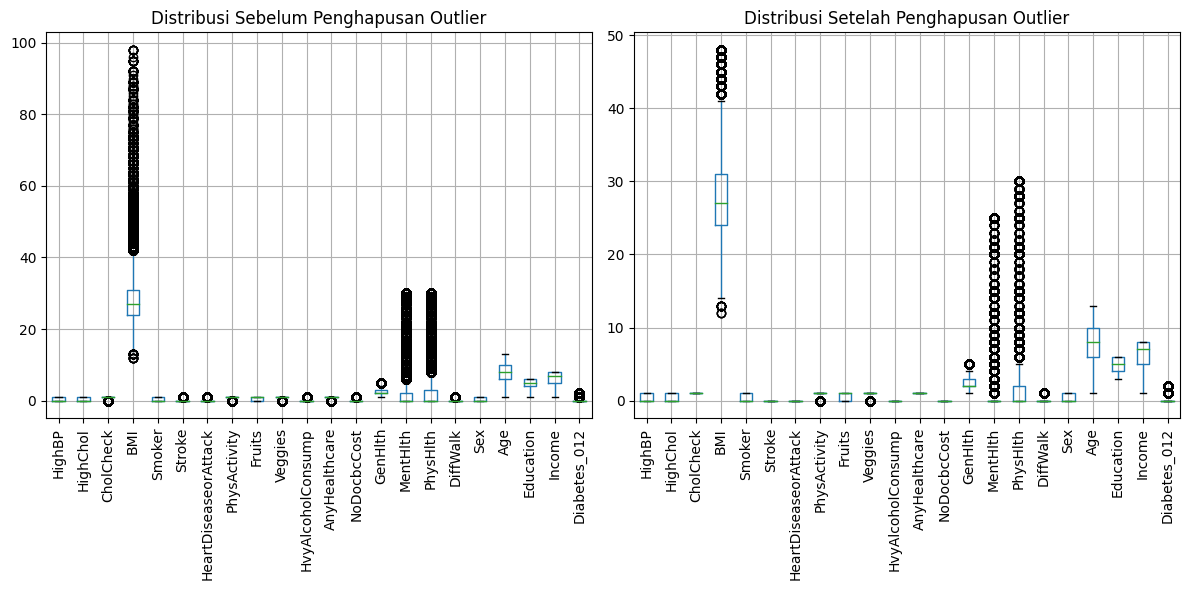

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Memisahkan fitur dan target
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Menggabungkan kembali untuk keperluan outlier detection
data = pd.concat([X, y], axis=1)

# Mengecek ukuran dataset sebelum penghapusan outlier
print("Ukuran dataset sebelum penghapusan outlier:", data.shape)

# Menghitung Z-score
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
threshold = 3  # threshold umum untuk z-score
outliers = np.where(z_scores > threshold)

# Menghitung jumlah outlier
num_outliers = len(np.unique(outliers[0]))
print("Jumlah outlier yang ditemukan:", num_outliers)

# Menghapus outlier
data_cleaned = data[(z_scores < threshold).all(axis=1)]

# Mengecek ukuran dataset setelah penghapusan outlier
print("Ukuran dataset setelah penghapusan outlier:", data_cleaned.shape)

# Visualisasi distribusi kelas sebelum dan sesudah penghapusan outlier
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
data.boxplot(rot=90)
plt.title('Distribusi Sebelum Penghapusan Outlier')

plt.subplot(1, 2, 2)
data_cleaned.boxplot(rot=90)
plt.title('Distribusi Setelah Penghapusan Outlier')

plt.tight_layout()
plt.show()

# Memisahkan fitur dan target dari dataset yang sudah dibersihkan
X_cleaned = data_cleaned.drop('Diabetes_012', axis=1)
y_cleaned = data_cleaned['Diabetes_012']

# Sesudah Penghapusan Outlier
Evaluasi menggunakan Logistic Regression dengan Oversampling (SMOTE) dan Undersampling (RandomUnderSampler)

In [ ]:
# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=42, stratify=y_cleaned)

# Oversampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Undersampling menggunakan RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Melatih model Logistic Regression dengan data oversampled
model_smote = LogisticRegression(random_state=42, max_iter=5000, solver='saga', tol=1e-3)
model_smote.fit(X_train_smote, y_train_smote)

# Memprediksi pada set pengujian
y_pred_smote = model_smote.predict(X_test)

# Evaluasi model dengan data oversampled
print("Evaluasi model Logistic Regression dengan oversampling (SMOTE):")
print(classification_report(y_test, y_pred_smote, zero_division=1))

# Melatih model Logistic Regression dengan data undersampled
model_rus = LogisticRegression(random_state=42, max_iter=5000, solver='saga', tol=1e-3)
model_rus.fit(X_train_rus, y_train_rus)

# Memprediksi pada set pengujian
y_pred_rus = model_rus.predict(X_test)

# Evaluasi model dengan data undersampled
print("Evaluasi model Logistic Regression dengan undersampling (RandomUnderSampler):")
print(classification_report(y_test, y_pred_rus, zero_division=1))

Evaluasi model Logistic Regression dengan oversampling (SMOTE):
              precision    recall  f1-score   support

         0.0       0.96      0.66      0.78     44359
         1.0       0.02      0.27      0.04       830
         2.0       0.30      0.57      0.39      5882

    accuracy                           0.64     51071
   macro avg       0.43      0.50      0.41     51071
weighted avg       0.87      0.64      0.73     51071

Evaluasi model Logistic Regression dengan undersampling (RandomUnderSampler):
              precision    recall  f1-score   support

         0.0       0.96      0.65      0.78     44359
         1.0       0.02      0.28      0.04       830
         2.0       0.30      0.56      0.39      5882

    accuracy                           0.64     51071
   macro avg       0.43      0.50      0.40     51071
weighted avg       0.87      0.64      0.72     51071



Evaluasi menggunakan Gradient Boost dengan Oversampling (SMOTE) dan Undersampling (RandomUnderSampler)

In [ ]:
# Melatih model Gradient Boosting dengan data oversampled
model_smote = GradientBoostingClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# Memprediksi pada set pengujian
y_pred_smote = model_smote.predict(X_test)

# Evaluasi model dengan data oversampled
print("Evaluasi model Gradient Boosting dengan oversampling (SMOTE):")
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote, zero_division=1))

# Melatih model Gradient Boosting dengan data undersampled
model_rus = GradientBoostingClassifier(random_state=42)
model_rus.fit(X_train_rus, y_train_rus)

# Memprediksi pada set pengujian
y_pred_rus = model_rus.predict(X_test)

# Evaluasi model dengan data undersampled
print("Evaluasi model Gradient Boosting dengan undersampling (RandomUnderSampler):")
print(classification_report(y_test, y_pred_rus, zero_division=1))

Evaluasi model Gradient Boosting dengan oversampling (SMOTE):
[[40827     0  3532]
 [  609     0   221]
 [ 3616     0  2266]]
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91     44359
         1.0       1.00      0.00      0.00       830
         2.0       0.38      0.39      0.38      5882

    accuracy                           0.84     51071
   macro avg       0.76      0.44      0.43     51071
weighted avg       0.85      0.84      0.84     51071

Evaluasi model Gradient Boosting dengan undersampling (RandomUnderSampler):
              precision    recall  f1-score   support

         0.0       0.96      0.61      0.74     44359
         1.0       0.02      0.33      0.04       830
         2.0       0.28      0.56      0.38      5882

    accuracy                           0.60     51071
   macro avg       0.42      0.50      0.39     51071
weighted avg       0.87      0.60      0.69     51071



Evaluasi menggunakan Decision Tree dengan Oversampling (SMOTE) dan Undersampling (RandomUnderSampler)

In [ ]:
# Melatih model Decision Tree dengan data oversampled
model_smote = DecisionTreeClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# Memprediksi pada set pengujian
y_pred_smote = model_smote.predict(X_test)

# Evaluasi model dengan data oversampled
print("Evaluasi model Decision Tree dengan oversampling (SMOTE):")
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote, zero_division=1))

# Melatih model Decision Tree dengan data undersampled
model_rus = DecisionTreeClassifier(random_state=42)
model_rus.fit(X_train_rus, y_train_rus)

# Memprediksi pada set pengujian
y_pred_rus = model_rus.predict(X_test)

# Evaluasi model dengan data undersampled
print("Evaluasi model Decision Tree dengan undersampling (RandomUnderSampler):")
print(classification_report(y_test, y_pred_rus, zero_division=1))

Evaluasi model Decision Tree dengan oversampling (SMOTE):
[[38822   878  4659]
 [  616    25   189]
 [ 4072   194  1616]]
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88     44359
         1.0       0.02      0.03      0.03       830
         2.0       0.25      0.27      0.26      5882

    accuracy                           0.79     51071
   macro avg       0.39      0.39      0.39     51071
weighted avg       0.80      0.79      0.80     51071

Evaluasi model Decision Tree dengan undersampling (RandomUnderSampler):
              precision    recall  f1-score   support

         0.0       0.94      0.49      0.64     44359
         1.0       0.02      0.39      0.04       830
         2.0       0.19      0.42      0.26      5882

    accuracy                           0.48     51071
   macro avg       0.38      0.43      0.32     51071
weighted avg       0.84      0.48      0.59     51071



## **Evaluasi dengan Seleksi Fitur**
# Seleksi Fitur
# Seleksi Fitur tanpa Penghapusan Outlier
Seleksi fitur menggunakan metode RFE (Recursive Feature Selection)

Fitur yang dipilih oleh RFE:
Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Fruits', 'AnyHealthcare',
       'GenHlth', 'Sex', 'Age', 'Income'],
      dtype='object')

Fitur sebelum seleksi:
Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


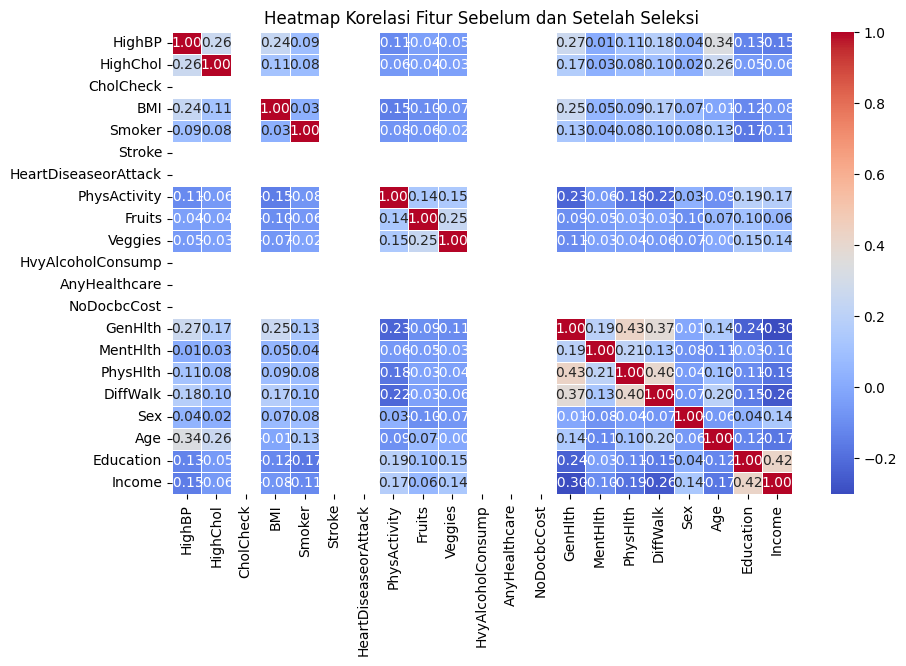

In [ ]:
from sklearn.feature_selection import RFE
import seaborn as sns

# Memisahkan fitur dan target
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Menggabungkan kembali untuk keperluan outlier detection
data = pd.concat([X, y], axis=1)

# Menghitung Z-score
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
threshold = 3  # threshold umum untuk z-score
outliers = np.where(z_scores > threshold)

# Menghapus outlier
data_cleaned = data[(z_scores < threshold).all(axis=1)]

# Memisahkan fitur dan target dari dataset yang sudah dibersihkan
X_cleaned = data_cleaned.drop('Diabetes_012', axis=1)
y_cleaned = data_cleaned['Diabetes_012']

# Menggunakan RFE dengan Logistic Regression untuk seleksi fitur
model = LogisticRegression(max_iter=5000, solver='saga', tol=1e-3)
rfe = RFE(model, n_features_to_select=10)  # Misal, kita ingin memilih 10 fitur terbaik
fit = rfe.fit(X_cleaned, y_cleaned)

# Menampilkan fitur yang dipilih
selected_features = X_cleaned.columns[fit.support_]
print("Fitur yang dipilih oleh RFE:")
print(selected_features)

# Dataset dengan fitur yang dipilih
X_selected = X_cleaned[selected_features]

# Menampilkan fitur sebelum seleksi
print("\nFitur sebelum seleksi:")
print(X_cleaned.columns)

# Visualisasi perubahan fitur dengan heatmap
plt.figure(figsize=(10, 6))
plt.title('Heatmap Korelasi Fitur Sebelum dan Setelah Seleksi')
sns.heatmap(X_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

# Setelah Seleksi Fitur Tanpa Penghapusan Outlier

Evaluasi menggunakan Logistic Regression dengan Oversampling (SMOTE) dan Undersampling (RandomUnderSampler)

In [ ]:
# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_cleaned, test_size=0.3, random_state=42, stratify=y_cleaned)

# Oversampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Undersampling menggunakan RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Melatih model Logistic Regression dengan data oversampled (SMOTE)
model_smote = LogisticRegression(random_state=42, max_iter=5000, solver='saga', tol=1e-3)
model_smote.fit(X_train_smote, y_train_smote)

# Memprediksi pada set pengujian dengan data oversampled (SMOTE)
y_pred_smote = model_smote.predict(X_test)

# Evaluasi model dengan data oversampled (SMOTE)
print("Evaluasi model Logistic Regression dengan oversampling (SMOTE):")
print(classification_report(y_test, y_pred_smote, zero_division=1))

# Melatih model Logistic Regression dengan data undersampled (RandomUnderSampler)
model_rus = LogisticRegression(random_state=42, max_iter=5000, solver='saga', tol=1e-3)
model_rus.fit(X_train_rus, y_train_rus)

# Memprediksi pada set pengujian dengan data undersampled (RandomUnderSampler)
y_pred_rus = model_rus.predict(X_test)

# Evaluasi model dengan data undersampled (RandomUnderSampler)
print("Evaluasi model Logistic Regression dengan undersampling (RandomUnderSampler):")
print(classification_report(y_test, y_pred_rus, zero_division=1))

Evaluasi model Logistic Regression dengan oversampling (SMOTE):
              precision    recall  f1-score   support

         0.0       0.96      0.66      0.78     44359
         1.0       0.02      0.28      0.05       830
         2.0       0.30      0.55      0.39      5882

    accuracy                           0.65     51071
   macro avg       0.43      0.50      0.41     51071
weighted avg       0.87      0.65      0.73     51071

Evaluasi model Logistic Regression dengan undersampling (RandomUnderSampler):
              precision    recall  f1-score   support

         0.0       0.96      0.66      0.78     44359
         1.0       0.02      0.27      0.04       830
         2.0       0.30      0.57      0.39      5882

    accuracy                           0.64     51071
   macro avg       0.43      0.50      0.41     51071
weighted avg       0.87      0.64      0.72     51071



Evaluasi menggunakan Gradient Boost dengan Oversampling (SMOTE) dan Undersampling (RandomUnderSampler)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi model Gradient Boosting
gb_model_smote = GradientBoostingClassifier(random_state=42)

# Melatih model dengan data oversampled (SMOTE)
gb_model_smote.fit(X_train_smote, y_train_smote)

# Memprediksi pada set pengujian dengan data oversampled (SMOTE)
y_pred_gb_smote = gb_model_smote.predict(X_test)

# Evaluasi model dengan data oversampled (SMOTE)
print("Evaluasi model Gradient Boosting dengan oversampling (SMOTE):")
print(classification_report(y_test, y_pred_gb_smote, zero_division=1))

# Inisialisasi model Gradient Boosting untuk undersampled data (RandomUnderSampler)
gb_model_rus = GradientBoostingClassifier(random_state=42)

# Melatih model dengan data undersampled (RandomUnderSampler)
gb_model_rus.fit(X_train_rus, y_train_rus)

# Memprediksi pada set pengujian dengan data undersampled (RandomUnderSampler)
y_pred_gb_rus = gb_model_rus.predict(X_test)

# Evaluasi model dengan data undersampled (RandomUnderSampler)
print("Evaluasi model Gradient Boosting dengan undersampling (RandomUnderSampler):")
print(classification_report(y_test, y_pred_gb_rus, zero_division=1))


Evaluasi model Gradient Boosting dengan oversampling (SMOTE):
              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87     44359
         1.0       0.01      0.00      0.00       830
         2.0       0.30      0.60      0.40      5882

    accuracy                           0.79     51071
   macro avg       0.42      0.48      0.43     51071
weighted avg       0.84      0.79      0.81     51071

Evaluasi model Gradient Boosting dengan undersampling (RandomUnderSampler):
              precision    recall  f1-score   support

         0.0       0.96      0.60      0.74     44359
         1.0       0.02      0.33      0.04       830
         2.0       0.28      0.56      0.38      5882

    accuracy                           0.59     51071
   macro avg       0.42      0.50      0.39     51071
weighted avg       0.87      0.59      0.69     51071



Evaluasi menggunakan Decision Tree dengan Oversampling (SMOTE) dan Undersampling (RandomUnderSampler)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree
dt_model_smote = DecisionTreeClassifier(random_state=42)

# Melatih model dengan data oversampled (SMOTE)
dt_model_smote.fit(X_train_smote, y_train_smote)

# Memprediksi pada set pengujian dengan data oversampled (SMOTE)
y_pred_dt_smote = dt_model_smote.predict(X_test)

# Evaluasi model dengan data oversampled (SMOTE)
print("Evaluasi model Decision Tree dengan oversampling (SMOTE):")
print(classification_report(y_test, y_pred_dt_smote, zero_division=1))

# Inisialisasi model Decision Tree untuk undersampled data (RandomUnderSampler)
dt_model_rus = DecisionTreeClassifier(random_state=42)

# Melatih model dengan data undersampled (RandomUnderSampler)
dt_model_rus.fit(X_train_rus, y_train_rus)

# Memprediksi pada set pengujian dengan data undersampled (RandomUnderSampler)
y_pred_dt_rus = dt_model_rus.predict(X_test)

# Evaluasi model dengan data undersampled (RandomUnderSampler)
print("Evaluasi model Decision Tree dengan undersampling (RandomUnderSampler):")
print(classification_report(y_test, y_pred_dt_rus, zero_division=1))

Evaluasi model Decision Tree dengan oversampling (SMOTE):
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90     44359
         1.0       0.02      0.02      0.02       830
         2.0       0.27      0.24      0.25      5882

    accuracy                           0.82     51071
   macro avg       0.40      0.39      0.39     51071
weighted avg       0.81      0.82      0.81     51071

Evaluasi model Decision Tree dengan undersampling (RandomUnderSampler):
              precision    recall  f1-score   support

         0.0       0.93      0.51      0.66     44359
         1.0       0.02      0.37      0.04       830
         2.0       0.19      0.39      0.25      5882

    accuracy                           0.49     51071
   macro avg       0.38      0.42      0.32     51071
weighted avg       0.83      0.49      0.60     51071



# Evaluasi dengan Seleksi Fitur dan Penghapusan Outlier
# Penghapusan Outlier

Ukuran dataset sebelum penghapusan outlier: (253680, 22)
Jumlah outlier yang ditemukan: 83444
Ukuran dataset setelah penghapusan outlier: (170236, 22)


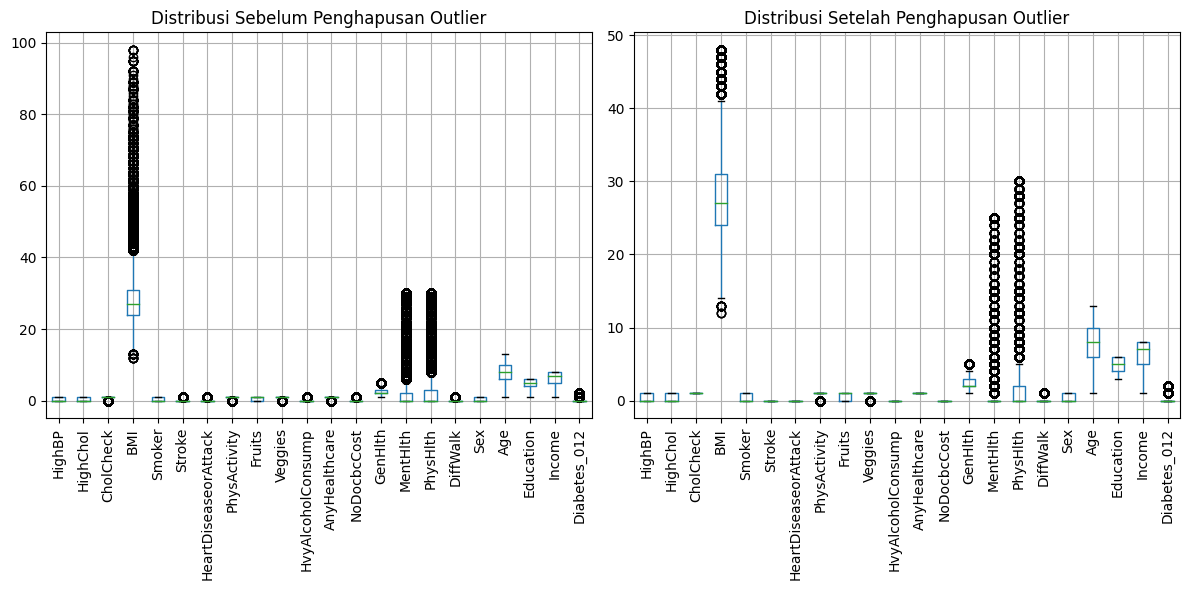

In [ ]:
# Memisahkan fitur dan target
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Menggabungkan kembali untuk keperluan outlier detection
data = pd.concat([X, y], axis=1)

# Mengecek ukuran dataset sebelum penghapusan outlier
print("Ukuran dataset sebelum penghapusan outlier:", data.shape)

# Menghitung Z-score
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
threshold = 3  # threshold umum untuk z-score
outliers = np.where(z_scores > threshold)

# Menghitung jumlah outlier
num_outliers = len(np.unique(outliers[0]))
print("Jumlah outlier yang ditemukan:", num_outliers)

# Menghapus outlier
data_cleaned = data[(z_scores < threshold).all(axis=1)]

# Mengecek ukuran dataset setelah penghapusan outlier
print("Ukuran dataset setelah penghapusan outlier:", data_cleaned.shape)

# Visualisasi distribusi fitur sebelum dan sesudah penghapusan outlier menggunakan boxplot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
data.boxplot(rot=90)
plt.title('Distribusi Sebelum Penghapusan Outlier')

plt.subplot(1, 2, 2)
data_cleaned.boxplot(rot=90)
plt.title('Distribusi Setelah Penghapusan Outlier')

plt.tight_layout()
plt.show()

# Memisahkan fitur dan target dari dataset yang sudah dibersihkan
X_cleaned = data_cleaned.drop('Diabetes_012', axis=1)
y_cleaned = data_cleaned['Diabetes_012']

# Seleksi Fitur dengan RFE Setelah Penghapusan Outlier

In [ ]:
# Menggunakan RFE dengan Logistic Regression untuk seleksi fitur
model = LogisticRegression(max_iter=5000, solver='saga', tol=1e-3)
rfe = RFE(model, n_features_to_select=8)  # Misal, kita ingin memilih 10 fitur terbaik
fit = rfe.fit(X_cleaned, y_cleaned)

# Menampilkan fitur yang dipilih
selected_features = X_cleaned.columns[fit.support_]
print("Fitur yang dipilih oleh RFE setelah penghapusan outlier:")
print(selected_features)

# Dataset dengan fitur yang dipilih
X_selected = X_cleaned[selected_features]

# Menampilkan fitur sebelum seleksi
print("\nFitur sebelum seleksi:")
print(X_cleaned.columns)

Fitur yang dipilih oleh RFE setelah penghapusan outlier:
Index(['HighBP', 'HighChol', 'CholCheck', 'Fruits', 'AnyHealthcare', 'GenHlth',
       'Sex', 'Age'],
      dtype='object')

Fitur sebelum seleksi:
Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


Evaluasi menggunakan Logistic Regression dengan Oversampling (SMOTE) dan Undersampling (RandomUnderSampler)

In [ ]:
# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=42, stratify=y_cleaned)

# Oversampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Undersampling menggunakan RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Inisialisasi model Logistic Regression
logreg_model = LogisticRegression(max_iter=5000, solver='saga', tol=1e-3)

# Melatih model Logistic Regression dengan data oversampled (SMOTE)
logreg_model.fit(X_train_smote, y_train_smote)

# Memprediksi pada set pengujian dengan data oversampled (SMOTE)
y_pred_logreg_smote = logreg_model.predict(X_test)

# Evaluasi model Logistic Regression dengan data oversampled (SMOTE)
print("Evaluasi model Logistic Regression dengan oversampling (SMOTE) setelah penghapusan outlier:")
print(classification_report(y_test, y_pred_logreg_smote, zero_division=1))

Evaluasi model Logistic Regression dengan oversampling (SMOTE) setelah penghapusan outlier:
              precision    recall  f1-score   support

         0.0       0.96      0.66      0.78     44359
         1.0       0.02      0.32      0.05       830
         2.0       0.31      0.53      0.39      5882

    accuracy                           0.64     51071
   macro avg       0.43      0.50      0.41     51071
weighted avg       0.87      0.64      0.72     51071



Evaluasi menggunakan Gradient Boost dengan Oversampling (SMOTE) dan Undersampling (RandomUnderSampler)

In [ ]:
# Oversampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Inisialisasi model Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Melatih model Gradient Boosting dengan data oversampled (SMOTE)
gb_model.fit(X_train_smote, y_train_smote)

# Memprediksi pada set pengujian dengan data oversampled (SMOTE)
y_pred_gb_smote = gb_model.predict(X_test)

# Evaluasi model Gradient Boosting dengan data oversampled (SMOTE)
print("Evaluasi model Gradient Boosting dengan oversampling (SMOTE) setelah penghapusan outlier:")
print(classification_report(y_test, y_pred_gb_smote, zero_division=1))

Evaluasi model Gradient Boosting dengan oversampling (SMOTE) setelah penghapusan outlier:
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91     44359
         1.0       1.00      0.00      0.00       830
         2.0       0.38      0.39      0.38      5882

    accuracy                           0.84     51071
   macro avg       0.76      0.44      0.43     51071
weighted avg       0.85      0.84      0.84     51071



Evaluasi menggunakan Decision Tree dengan Oversampling (SMOTE) dan Undersampling (RandomUnderSampler)

In [ ]:
# Oversampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Melatih model Decision Tree dengan data oversampled (SMOTE)
dt_model.fit(X_train_smote, y_train_smote)

# Memprediksi pada set pengujian dengan data oversampled (SMOTE)
y_pred_dt_smote = dt_model.predict(X_test)

# Evaluasi model Decision Tree dengan data oversampled (SMOTE)
print("Evaluasi model Decision Tree dengan oversampling (SMOTE) setelah penghapusan outlier:")
print(classification_report(y_test, y_pred_dt_smote, zero_division=1))

Evaluasi model Decision Tree dengan oversampling (SMOTE) setelah penghapusan outlier:
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88     44359
         1.0       0.02      0.03      0.03       830
         2.0       0.25      0.27      0.26      5882

    accuracy                           0.79     51071
   macro avg       0.39      0.39      0.39     51071
weighted avg       0.80      0.79      0.80     51071

